In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
    from pdtr import ParseDecisionTreeRules
except ModuleNotFoundError:
    import sys
    
    sys.path.append("../")
    from pdtr import ParseDecisionTreeRules

np.random.seed(1)

In [2]:
# !pip install -r ../requirements.txt -U
# !pip install git+https://github.com/itlubber/scorecardpipeline.git
# !pip install -U scorecardpipeline -i https://pypi.Python.org/simple

In [3]:
# import dtreeviz
# import matplotlib.pyplot as plt
# from matplotlib import font_manager
# from scorecardpipeline import init_setting
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#
# dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/titanic/titanic.csv"
# dataset = pd.read_csv(dataset_url)
# # Fill missing values for Age
# dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# # Encode categorical variables
# dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
# dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
# dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
#
# features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
# target = "Survived"
#
# tree_classifier = DecisionTreeClassifier(max_depth=3)
# tree_classifier.fit(dataset[features].values, dataset[target].values)
#
# viz_model = dtreeviz.model(tree_classifier,
#                            X_train=dataset[features], y_train=dataset[target],
#                            feature_names=[f"变量_{c}" for c in features],
#                            target_name=target, class_names=["perish", "survive"])
#
# init_setting()
#
#
# viz_model.view(
#                 scale=1,
#                 orientation='LR',
#                 colors={
#                     "classes": [None, None, ["#2639E9", "#F76E6C"], ["#2639E9", "#F76E6C", "#FE7715", "#FFFFFF"]],
#                     "arrow": "#2639E9",
#                     'text_wedge': "#F76E6C",
#                     "pie": "#2639E9",
#                     "tile_alpha": 1,
#                     "legend_edge": "#FFFFFF",
#                 },
#                 ticks_fontsize=10,
#                 label_fontsize=10,
#                 fontname=plt.rcParams['font.family'],
#             )

In [4]:
feature_map = {}
n_samples = 10000
ab = np.array(list('ABCDEFG'))

data = pd.DataFrame({
    'A': np.random.randint(10, size = n_samples),
    'B': ab[np.random.choice(7, n_samples)],
    'C': ab[np.random.choice(2, n_samples)],
    '时间': np.random.random(size = n_samples),
    'target': np.random.randint(2, size = n_samples)
})

train, test = train_test_split(data, test_size=0.3, shuffle=data["target"])

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']

['sans-serif']

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,时间 > 0.999 & A <= 6.5,7,0.001000,7,0.001947,0,0.000000,0.000000,0.486286,0.000000
1,时间 <= 0.999 & 时间 <= 0.999,6986,0.998000,3589,0.998053,3397,0.997944,0.486258,0.486286,0.999943
2,时间 <= 0.999 & 时间 > 0.999,6,0.000857,0,0.000000,6,0.001763,1.000000,0.486286,2.056404
3,时间 > 0.999 & A > 6.5,1,0.000143,0,0.000000,1,0.000294,1.000000,0.486286,2.056404


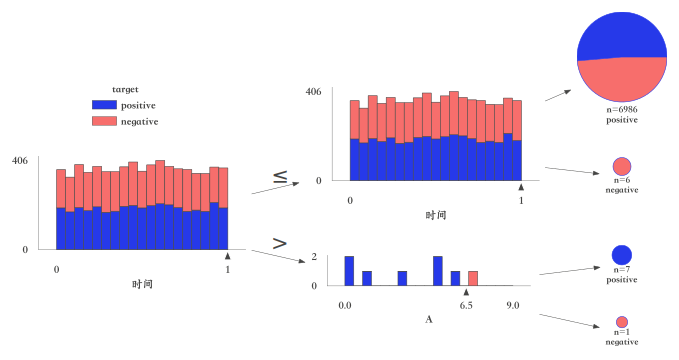

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,C <= 0.486 & B <= 0.483,1552,0.221714,832,0.231368,720,0.211516,0.463918,0.486286,0.954002
1,C > 0.486 & B <= 0.499,3026,0.432286,1543,0.429088,1483,0.435664,0.490086,0.486286,1.007815
2,C <= 0.486 & B > 0.483,1967,0.281000,1002,0.278643,965,0.283490,0.490595,0.486286,1.008861
3,C > 0.486 & B > 0.499,455,0.065000,219,0.060901,236,0.069330,0.518681,0.486286,1.066618


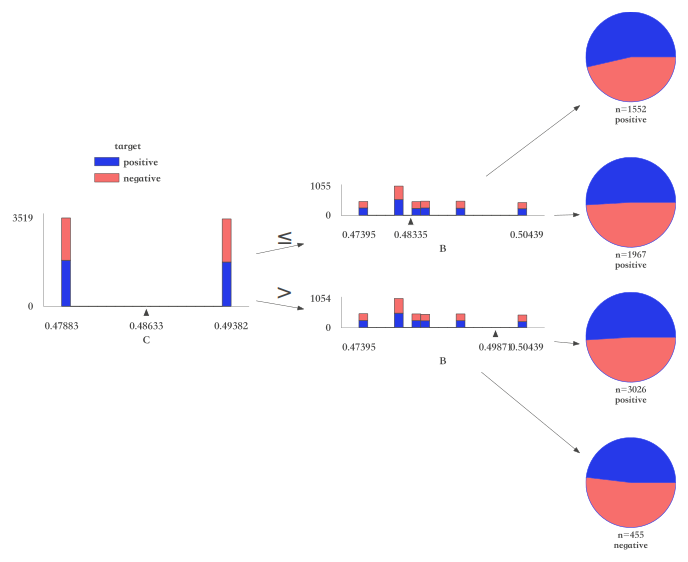

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,A <= 5.5 & A > 3.5,1451,0.207286,769,0.213849,682,0.200353,0.470021,0.486286,0.966553
1,A <= 5.5 & A <= 3.5,2770,0.395714,1431,0.397942,1339,0.393361,0.483394,0.486286,0.994052
2,A > 5.5 & C <= 0.486,1404,0.200571,718,0.199666,686,0.201528,0.488604,0.486286,1.004767
3,A > 5.5 & C > 0.486,1375,0.196429,678,0.188543,697,0.204759,0.506909,0.486286,1.042410


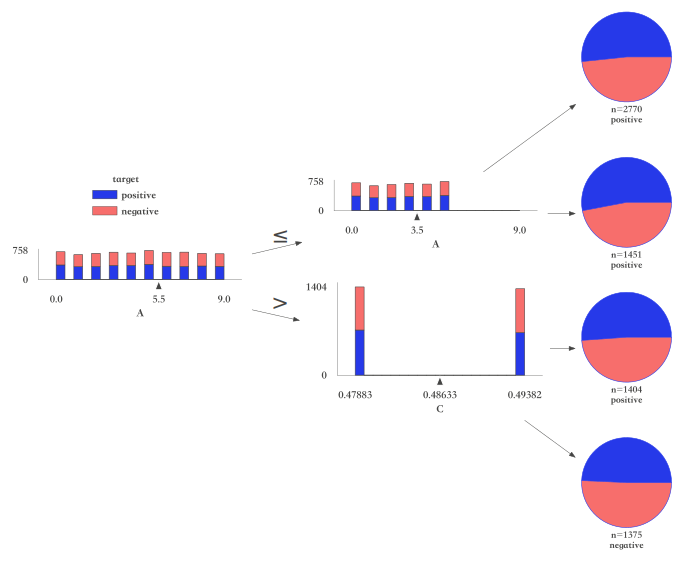

In [6]:
pdtr_instance = ParseDecisionTreeRules(target="target", max_iter=8)
pdtr_instance.fit(train, lift=0., max_depth=2, max_samples=1., verbose=True, max_features="auto")
all_rules = pdtr_instance.insert_all_rules(test=test)
pdtr_instance.save()

In [7]:
all_rules[0]

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,时间 > 0.999 & A <= 6.5,7,0.001000,7,0.001947,0,0.000000,0.000000,0.486286,0.000000
1,时间 <= 0.999 & 时间 <= 0.999,6986,0.998000,3589,0.998053,3397,0.997944,0.486258,0.486286,0.999943
2,时间 <= 0.999 & 时间 > 0.999,6,0.000857,0,0.000000,6,0.001763,1.000000,0.486286,2.056404
3,时间 > 0.999 & A > 6.5,1,0.000143,0,0.000000,1,0.000294,1.000000,0.486286,2.056404
4,C <= 0.486 & B <= 0.483,1552,0.221714,832,0.231368,720,0.211516,0.463918,0.486286,0.954002
5,C > 0.486 & B <= 0.499,3026,0.432286,1543,0.429088,1483,0.435664,0.490086,0.486286,1.007815
6,C <= 0.486 & B > 0.483,1967,0.281000,1002,0.278643,965,0.283490,0.490595,0.486286,1.008861
7,C > 0.486 & B > 0.499,455,0.065000,219,0.060901,236,0.069330,0.518681,0.486286,1.066618
8,A <= 5.5 & A > 3.5,1451,0.207286,769,0.213849,682,0.200353,0.470021,0.486286,0.966553
9,A <= 5.5 & A <= 3.5,2770,0.395714,1431,0.397942,1339,0.393361,0.483394,0.486286,0.994052


In [8]:
all_rules[1]

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,时间 > 0.999 & A <= 6.5,1,0.000333,0,0.0,1,0.000685,1.0,0.486667,2.054795
1,时间 <= 0.999 & 时间 <= 0.999,2999,0.999667,1540,1.0,1459,0.999315,0.486495,0.486667,0.999648
2,时间 <= 0.999 & 时间 > 0.999,0,0.0,0,0.0,0,0.0,0.0,0.486667,0.0
3,时间 > 0.999 & A > 6.5,0,0.0,0,0.0,0,0.0,0.0,0.486667,0.0
4,C <= 0.486 & B <= 0.483,666,0.222,328,0.212987,338,0.231507,0.507508,0.486667,1.042824
5,C > 0.486 & B <= 0.499,1282,0.427333,667,0.433117,615,0.421233,0.479719,0.486667,0.985724
6,C <= 0.486 & B > 0.483,847,0.282333,441,0.286364,406,0.278082,0.479339,0.486667,0.984943
7,C > 0.486 & B > 0.499,205,0.068333,104,0.067532,101,0.069178,0.492683,0.486667,1.012362
8,A <= 5.5 & A > 3.5,604,0.201333,319,0.207143,285,0.195205,0.471854,0.486667,0.969564
9,A <= 5.5 & A <= 3.5,1162,0.387333,591,0.383766,571,0.391096,0.491394,0.486667,1.009714


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,A,训练数据集,"[负无穷 , 1.5)",1375,0.196429,720,0.200222,655,0.192421,0.476364,0.039740,0.000310,0.003564,0.979596,0.979596,720,655,-0.007802
1,A,训练数据集,"[1.5 , 3.5)",1395,0.199286,711,0.197720,684,0.200940,0.490323,-0.016161,0.000052,0.003564,1.008301,0.994052,1431,1339,-0.004581
2,A,训练数据集,"[3.5 , 5.5)",1451,0.207286,769,0.213849,682,0.200353,0.470021,0.065185,0.000880,0.003564,0.966553,0.984599,2200,2021,-0.018078
3,A,训练数据集,"[5.5 , 7.5)",1424,0.203429,694,0.192992,730,0.214454,0.512640,-0.105448,0.002263,0.003564,1.054196,1.002156,2894,2751,0.003384
4,A,训练数据集,"[7.5 , 正无穷)",1355,0.193571,702,0.195217,653,0.191833,0.481919,0.017480,0.000059,0.003564,0.991020,1.000000,3596,3404,0.000000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,A,测试数据集,"[负无穷 , 1.5)",562,0.187333,287,0.186364,275,0.188356,0.489324,-0.010640,0.000021,0.002313,1.005460,1.005460,287,275,0.001993
1,A,测试数据集,"[1.5 , 3.5)",600,0.200000,304,0.197403,296,0.202740,0.493333,-0.026683,0.000142,0.002313,1.013699,1.009714,591,571,0.007330
2,A,测试数据集,"[3.5 , 5.5)",604,0.201333,319,0.207143,285,0.195205,0.471854,0.059351,0.000708,0.002313,0.969564,0.995982,910,856,-0.004608
3,A,测试数据集,"[5.5 , 7.5)",613,0.204333,304,0.197403,309,0.211644,0.504078,-0.069664,0.000992,0.002313,1.035777,1.006236,1214,1165,0.009634
4,A,测试数据集,"[7.5 , 正无穷)",621,0.207000,326,0.211688,295,0.202055,0.475040,0.046571,0.000449,0.002313,0.976110,1.000000,1540,1460,0.000000


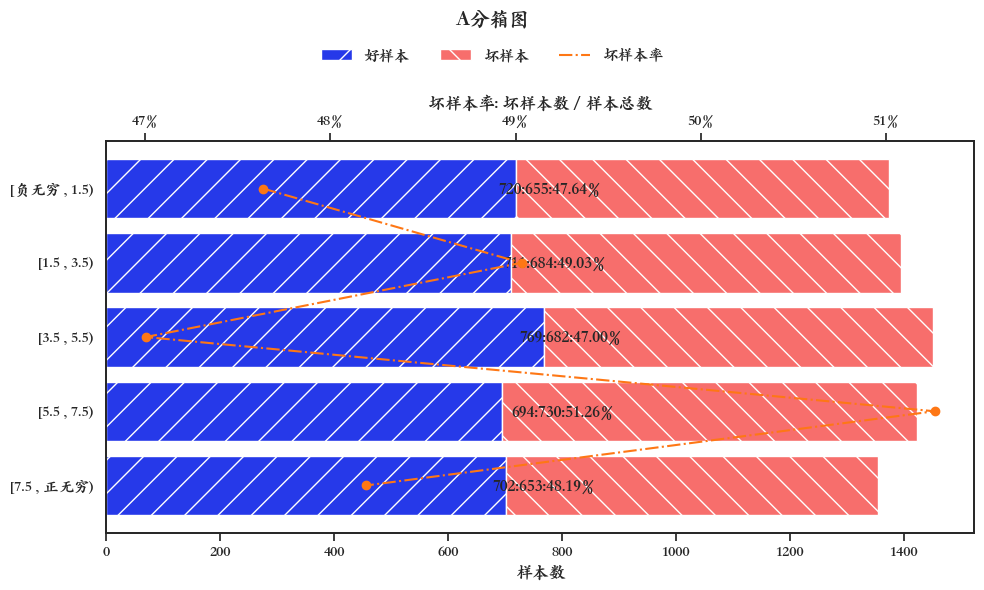

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,B,训练数据集,"D,A",2057,0.293857,1074,0.298665,983,0.288778,0.477880,0.033662,0.000333,0.001028,0.982715,0.982715,1074,983,-0.009887
1,B,训练数据集,C,1050,0.150000,544,0.151279,506,0.148649,0.481905,0.017535,0.000046,0.001028,0.990991,0.985512,1618,1489,-0.012518
2,B,训练数据集,"F,G",1977,0.282429,1017,0.282814,960,0.282021,0.485584,0.002805,0.000002,0.001028,0.998557,0.990585,2635,2449,-0.013311
3,B,训练数据集,"E,B",1916,0.273714,961,0.267241,955,0.280552,0.498434,-0.048611,0.000647,0.001028,1.024982,1.000000,3596,3404,0.000000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,B,测试数据集,"D,A",870,0.290000,430,0.279221,440,0.301370,0.505747,-0.076339,0.001691,0.004391,1.039206,1.039206,430,440,0.022149
1,B,测试数据集,C,432,0.144000,216,0.140260,216,0.147945,0.500000,-0.053353,0.000410,0.004391,1.027397,1.035288,646,656,0.029835
2,B,测试数据集,"F,G",829,0.276333,444,0.288312,385,0.263699,0.464415,0.089231,0.002196,0.004391,0.954277,1.003773,1090,1041,0.005221
3,B,测试数据集,"E,B",869,0.289667,450,0.292208,419,0.286986,0.482163,0.018027,0.000094,0.004391,0.990747,1.000000,1540,1460,0.000000


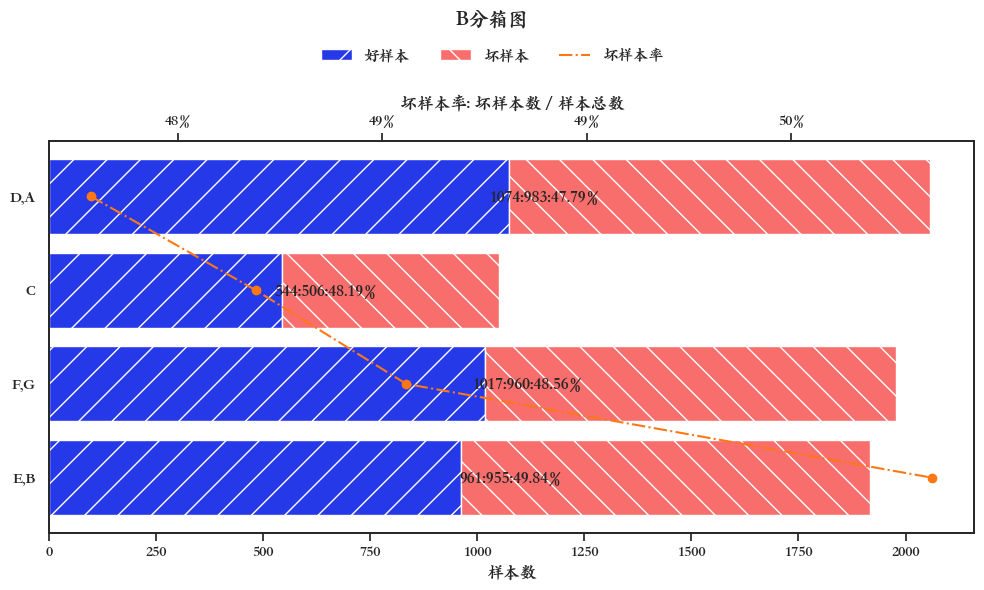

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,C,训练数据集,B,3519,0.502714,1834,0.510011,1685,0.495006,0.478829,0.029861,0.000448,0.000901,0.984666,0.984666,1834,1685,-0.015005
1,C,训练数据集,A,3481,0.497286,1762,0.489989,1719,0.504994,0.493824,-0.030166,0.000453,0.000901,1.015501,1.000000,3596,3404,0.000000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,C,测试数据集,B,1513,0.504333,769,0.499351,744,0.509589,0.491738,-0.020298,0.000208,0.000419,1.010421,1.010421,769,744,0.010238
1,C,测试数据集,A,1487,0.495667,771,0.500649,716,0.490411,0.481506,0.020660,0.000212,0.000419,0.989397,1.000000,1540,1460,0.000000


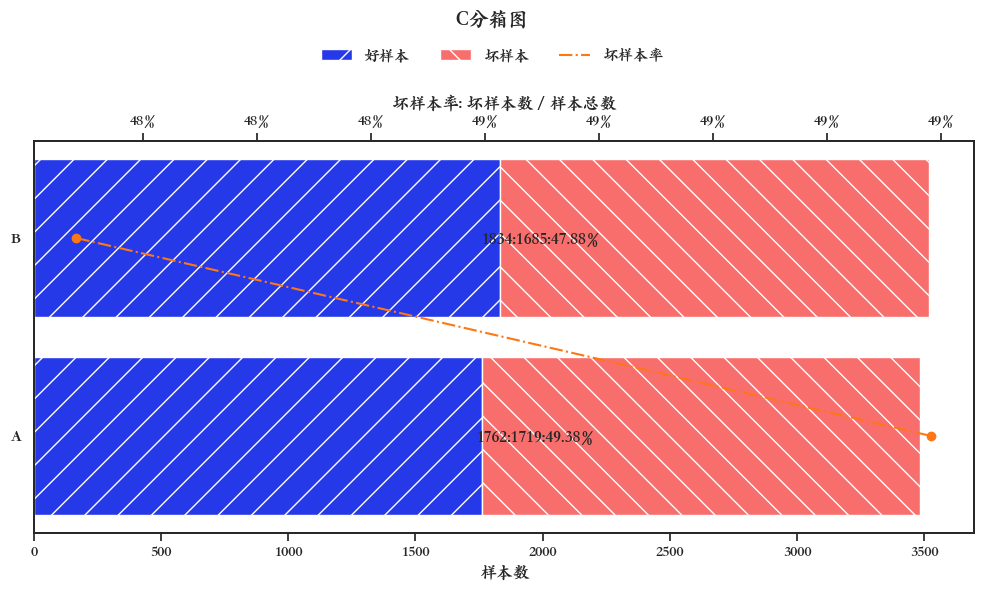

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,时间,训练数据集,"[负无穷 , 0.2488)",1696,0.242286,870,0.241935,826,0.242656,0.487028,-0.002977,2.143785e-06,0.00344,1.001527,1.001527,870,826,0.000720
1,时间,训练数据集,"[0.2488 , 0.4015)",1051,0.150143,509,0.141546,542,0.159224,0.515699,-0.117695,2.080648e-03,0.00344,1.060486,1.024085,1379,1368,0.018398
2,时间,训练数据集,"[0.4015 , 0.584)",1334,0.190571,694,0.192992,640,0.188014,0.479760,0.026128,1.300659e-04,0.00344,0.986581,1.011825,2073,2008,0.013420
3,时间,训练数据集,"[0.584 , 0.7333)",1086,0.155143,582,0.161846,504,0.148061,0.464088,0.089017,1.227128e-03,0.00344,0.954353,0.999746,2655,2512,-0.000365
4,时间,训练数据集,"[0.7333 , 正无穷)",1833,0.261857,941,0.261680,892,0.262045,0.486634,-0.001398,5.101790e-07,0.00344,1.000716,1.000000,3596,3404,0.000000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,时间,测试数据集,"[负无穷 , 0.2488)",743,0.247667,400,0.259740,343,0.234932,0.461642,0.100384,0.002490,0.006393,0.948579,0.948579,400,343,-0.024809
1,时间,测试数据集,"[0.2488 , 0.4015)",452,0.150667,230,0.149351,222,0.152055,0.491150,-0.017951,0.000049,0.006393,1.009213,0.971514,630,565,-0.022105
2,时间,测试数据集,"[0.4015 , 0.584)",571,0.190333,273,0.177273,298,0.204110,0.521891,-0.140973,0.003783,0.006393,1.072380,1.004127,903,863,0.004732
3,时间,测试数据集,"[0.584 , 0.7333)",436,0.145333,226,0.146753,210,0.143836,0.481651,0.020075,0.000059,0.006393,0.989695,1.001269,1129,1073,0.001815
4,时间,测试数据集,"[0.7333 , 正无穷)",798,0.266000,411,0.266883,387,0.265068,0.484962,0.006819,0.000012,0.006393,0.996498,1.000000,1540,1460,0.000000


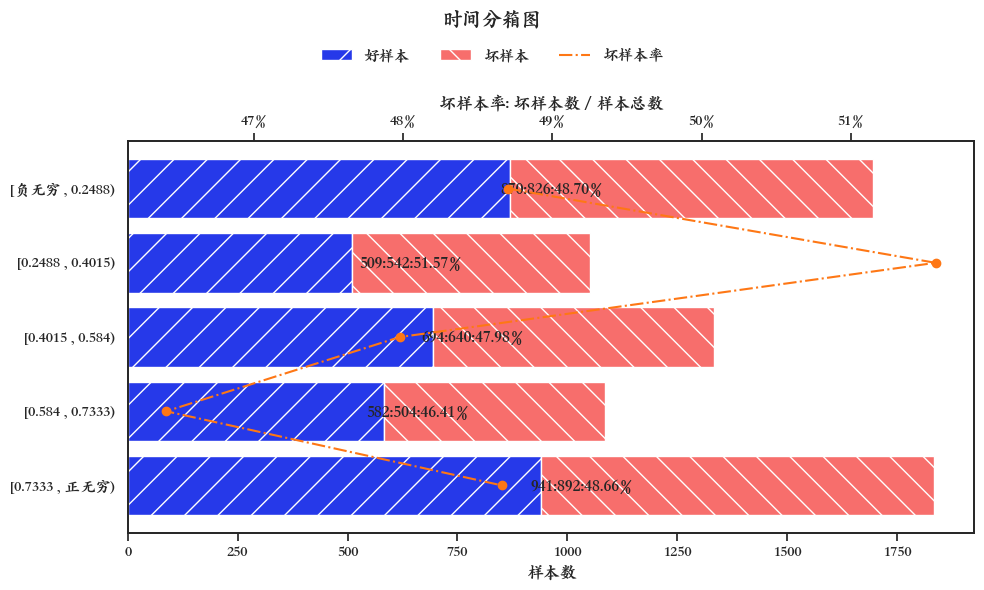

In [9]:
import matplotlib.pyplot as plt
from scorecardpipeline import inverse_feature_bins

for col in data.columns.drop("target"):
    feature_table_train = pdtr_instance.query_feature_rule(train, col, desc="训练数据集", ks=True, min_bin_size=0.15, max_bin_size=3, method="dt")
    feature_table_test = pdtr_instance.query_feature_rule(test, col, desc="测试数据集", ks=True, rules=inverse_feature_bins(feature_table_train))
    display(feature_table_train)
    display(feature_table_test)
    pdtr_instance.bin_plot(feature_table_train, desc=col, save=f"model_report/bin_plots/bin_vars_{col}.png")
    plt.show()

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,A,单变量策略挖掘,"[负无穷 , 1.5)",1937,0.1937,1007,0.196067,930,0.191201,0.480124,0.025128,0.000122,0.002991,0.987097,0.987097,1007,930,-0.004866
1,A,单变量策略挖掘,"[1.5 , 3.5)",1995,0.1995,1015,0.197625,980,0.201480,0.491228,-0.019327,0.000075,0.002991,1.009926,0.998680,2022,1910,-0.001011
2,A,单变量策略挖掘,"[3.5 , 5.5)",2055,0.2055,1088,0.211838,967,0.198808,0.470560,0.063479,0.000827,0.002991,0.967433,0.987955,3110,2877,-0.014041
3,A,单变量策略挖掘,"[5.5 , 7.5)",2037,0.2037,998,0.194315,1039,0.213610,0.510064,-0.094679,0.001827,0.002991,1.048651,1.003363,4108,3916,0.005254
4,A,单变量策略挖掘,"[7.5 , 正无穷)",1976,0.1976,1028,0.200156,948,0.194901,0.479757,0.026597,0.000140,0.002991,0.986343,1.000000,5136,4864,0.000000


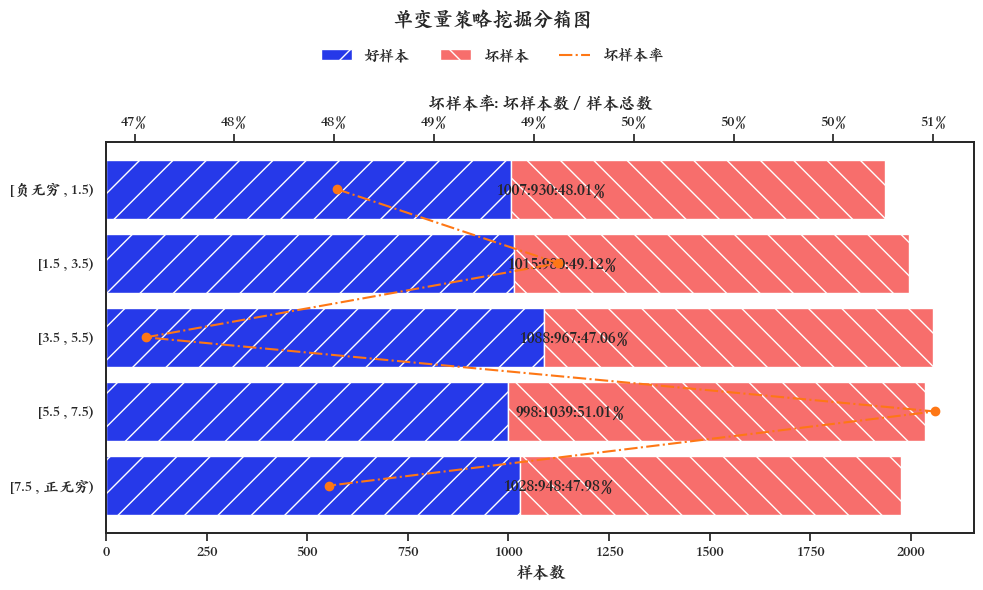

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,B,单变量策略挖掘,"F,B,G",4245,0.4245,2210,0.430296,2035,0.418380,0.479388,0.028081,3.346123e-04,0.00086,0.985583,0.985583,2210,2035,-0.011916
1,B,单变量策略挖掘,"D,A",2927,0.2927,1504,0.292835,1423,0.292558,0.486163,0.000944,2.618134e-07,0.00086,0.999513,0.991268,3714,3458,-0.012193
2,B,单变量策略挖掘,"E,C",2828,0.2828,1422,0.276869,1406,0.289062,0.497171,-0.043101,5.255494e-04,0.00086,1.022145,1.000000,5136,4864,0.000000


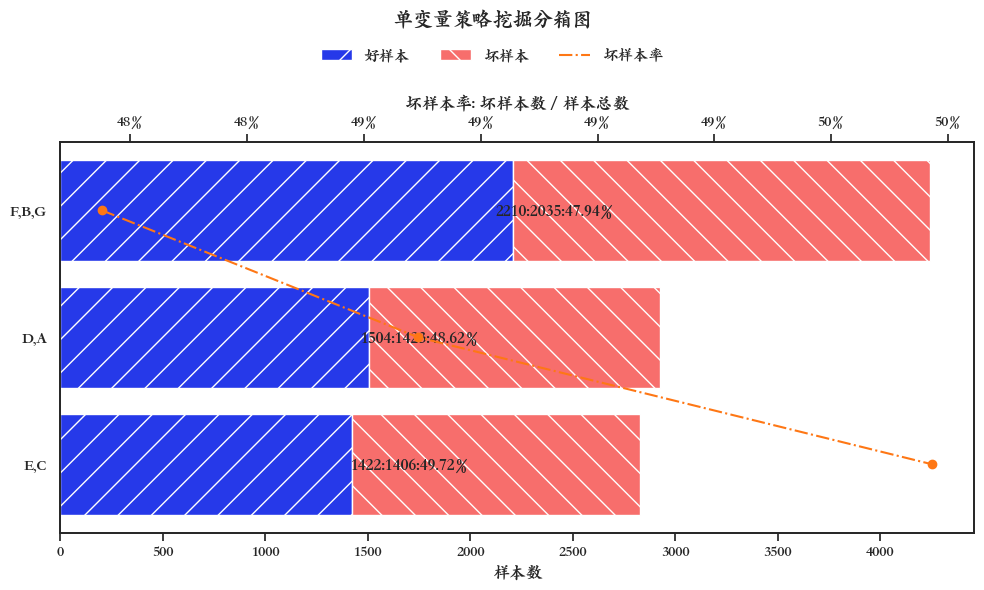

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,C,单变量策略挖掘,B,5032,0.5032,2603,0.506815,2429,0.499383,0.482711,0.014770,0.000110,0.000221,0.992415,0.992415,2603,2429,-0.007431
1,C,单变量策略挖掘,A,4968,0.4968,2533,0.493185,2435,0.500617,0.490137,-0.014958,0.000111,0.000221,1.007683,1.000000,5136,4864,0.000000


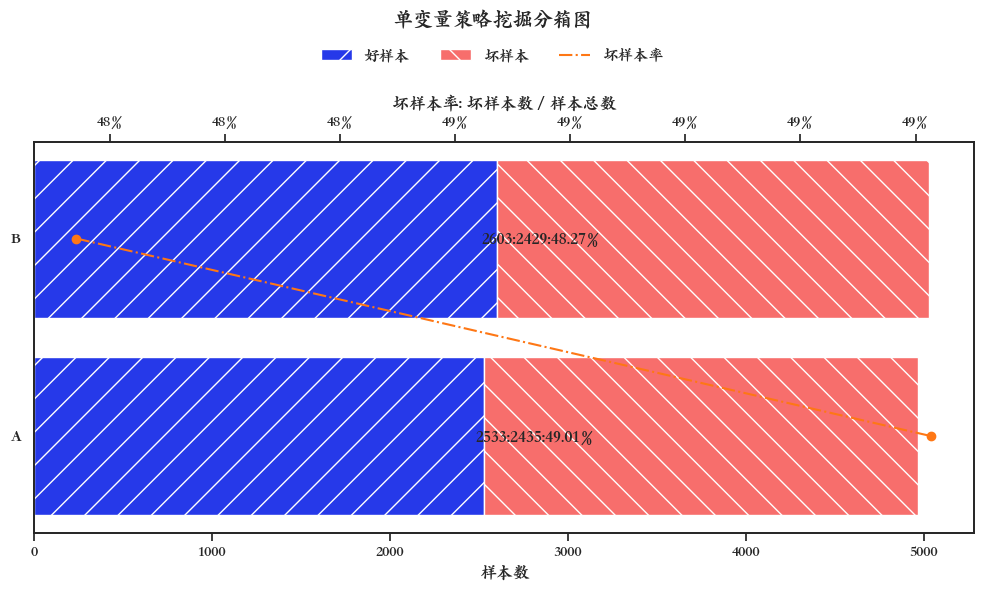

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,时间,单变量策略挖掘,"[负无穷 , 0.251)",2464,0.2464,1285,0.250195,1179,0.242393,0.478490,0.031675,0.000247,0.002869,0.983738,0.983738,1285,1179,-0.007802
1,时间,单变量策略挖掘,"[0.251 , 0.4917)",2432,0.2432,1198,0.233255,1234,0.253701,0.507401,-0.084025,0.001718,0.002869,1.043177,1.013263,2483,2413,0.012644
2,时间,单变量策略挖掘,"[0.4917 , 0.6728)",1858,0.1858,972,0.189252,886,0.182155,0.476857,0.038220,0.000271,0.002869,0.980380,1.004217,3455,3299,0.005546
3,时间,单变量策略挖掘,"[0.6728 , 0.8371)",1623,0.1623,824,0.160436,799,0.164268,0.492298,-0.023610,0.000090,0.002869,1.012126,1.005750,4279,4098,0.009378
4,时间,单变量策略挖掘,"[0.8371 , 正无穷)",1623,0.1623,857,0.166861,766,0.157484,0.471965,0.057836,0.000542,0.002869,0.970324,1.000000,5136,4864,0.000000


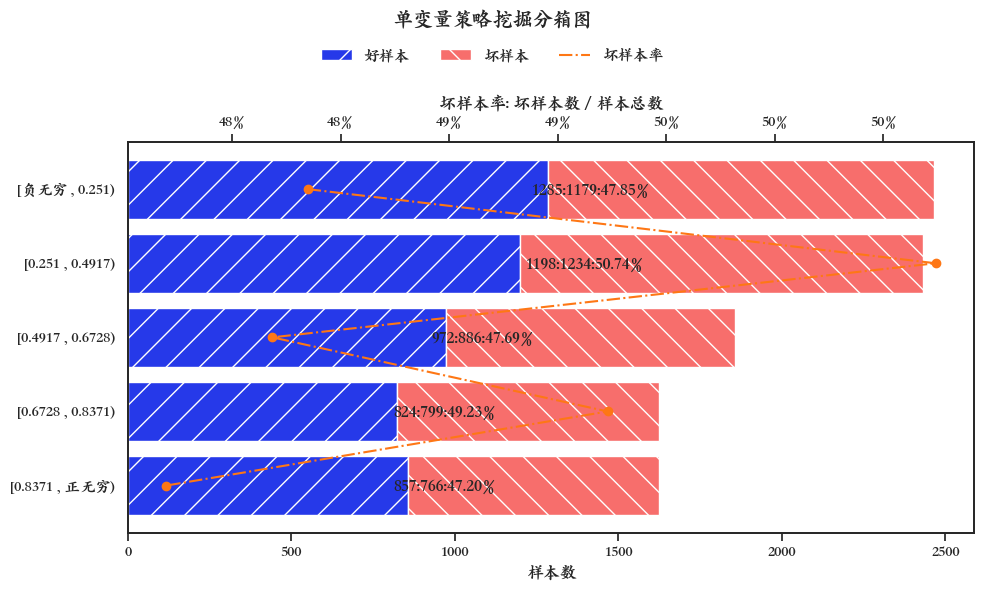

In [10]:
for col in data.columns.drop("target"):
    train_feature_table = pdtr_instance.query_feature_rule(data, col, desc="单变量策略挖掘", plot=True, ks=True, min_bin_size=0.15, max_bin_size=3, method="dt")
    display(train_feature_table)
    plt.show()